In [27]:
import torch.nn as nn
from torchvision import models

class CNN(nn.Module):
    def __init__(self, size, num_classes):
        super(CNN, self).__init__()

        # ### convolutional feature extraction
        # self.extract = nn.Sequential(
        #     nn.Conv2d (in_channels = size, out_channels = 32, kernel_size = 3),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d (in_channels = 32, out_channels = 32, kernel_size = 3),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride = 2, padding = 2),
        #     nn.ReLU(inplace = True),
        #     # nn.MaxPool2d(2),
        #     nn.Dropout(0.4),

        #     nn.Conv2d (in_channels = 64, out_channels = 64, kernel_size = 3),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d (in_channels = 64, out_channels = 64, kernel_size = 3),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 5, stride = 2, padding = 2),
        #     nn.ReLU(inplace = True),
        #     # nn.MaxPool2d(2),
        #     nn.Dropout(0.4)
        # )
        # ### MLP classifier
        # self.decimate = nn.Sequential( 
        #     nn.Linear(64 * 4 * 4, 128),
        #     nn.ReLU(inplace = True),
        #     nn.Dropout(0.4),
        #     nn.Linear(128, num_classes)
        # )

        ### convolutional feature extraction
        self.extract = nn.Sequential(
            ### first later
            nn.Conv2d (in_channels = size, out_channels = 32, kernel_size = 5, stride = 1, padding = 2),
            ### first layer non-linearity
            nn.ReLU(inplace = True),
            ### pool layer
            nn.MaxPool2d(2),
            nn.Dropout(0),
            ### second layer
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride = 1, padding = 2),
            ### nonlinearity
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            nn.Dropout(0)
        )
        ### MLP classifier
        self.decimate = nn.Sequential( 
            nn.Linear(64 * 7 * 7, 256),
            nn.ReLU(inplace = True),
            nn.Dropout(0),
            nn.Linear(256, num_classes)
        )

        # 6-layer 784-50-100-500-1000-10-10
        # ### convolutional feature extraction
        # self.extract = nn.Sequential(
        #     nn.Conv2d (in_channels = size, out_channels = 50, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True),
        #     nn.MaxPool2d(2),
        #     nn.Dropout(0.1),
        #     nn.Conv2d(in_channels = 50, out_channels = 100, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True),
            
        #     nn.Conv2d(in_channels = 100, out_channels = 500, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d(in_channels = 500, out_channels = 1000, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d(in_channels = 1000, out_channels = 10, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True),
        #     nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, stride = 1, padding = 1),
        #     nn.ReLU(inplace = True)
        # )

    ### forward pass
    def forward(self, x):
            ### convolutional laters
            features = self.extract(x)
            ### turn matrix into 1D array
            features = features.view(features.size()[0], -1)
            ### run MLP
            myresult = self.decimate(features)
            return myresult

        

In [28]:
import os
import torch
import numpy as np
from torchvision import datasets
import torchvision

# nice built in functions for common data sets 
#  go read https://pytorch.org/docs/stable/torchvision/datasets.html
train = datasets.MNIST( root = './', # where to download data set to
                       train = True, # If True, creates dataset from training.pt, otherwise from test.pt
                       transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]), # convert data into tensor vs PIL image 
                       download = True)

[num of images, image x size, image y size]
torch.Size([60000, 28, 28])
what type of data is it?
<class 'torch.Tensor'>
what is min and max values?
tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


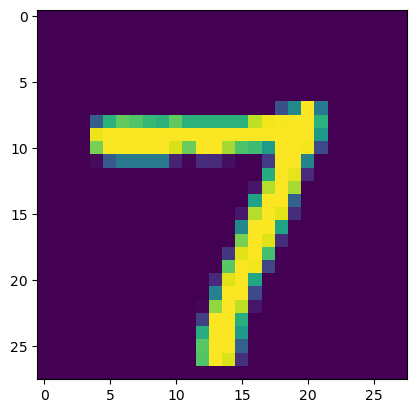

In [29]:
print("[num of images, image x size, image y size]")
print(train.data.shape)

print("what type of data is it?")
print(type(train.data[0]))

print("what is min and max values?")
print(torch.max(train.data[0]))
print(torch.min(train.data[0]))

# lets plot it
import matplotlib.pyplot as plt
import random
plt.imshow(train.data[random.randint(0,59999)])

### Data Loader     

In [30]:
import torch.utils.data as tech

batch_size = 4

train_ld = tech.DataLoader(dataset=train, shuffle=True, batch_size = batch_size)

In [31]:
input_size = 1
num_classes = 10
model = CNN(input_size, num_classes)

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
costfx = torch.nn.CrossEntropyLoss()

In [32]:
# Run it!

from tqdm import tqdm_notebook as tqdm

num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = []

    for batch_id, train_params in enumerate(tqdm(train_ld)):
        samples, labels = train_params

        samples = samples.type('torch.FloatTensor')
        labels = labels.type('torch.LongTensor')

        # forward pass
        prediction = model(samples)
        # find error
        loss = costfx(prediction, labels)
        # record loss
        epoch_loss.append(loss.item())
        # zero gradients
        optimizer.zero_grad()
        # back prop
        loss.backward()
        # update everything
        optimizer.step()
    
    epoch_loss = sum(epoch_loss)/len(epoch_loss)

torch.save(model, './my_mnist_model.pt')
model = model.eval()


/tmp/ipykernel_944/1326243968.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, train_params in enumerate(tqdm(train_ld)):


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

### Run Test Data

/tmp/ipykernel_944/2974614743.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sample, label in tqdm(test2):


  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_944/2974614743.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label.numpy())


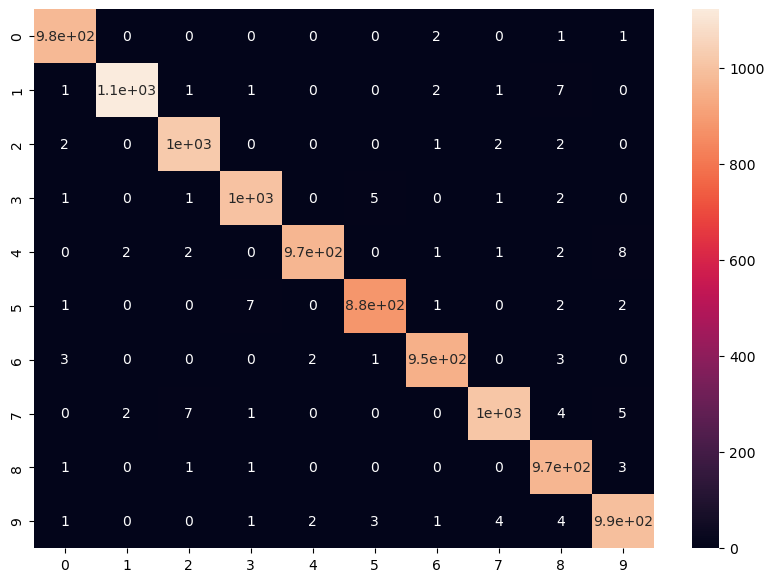

0.9887


In [33]:
test = datasets.MNIST( root = './', train = False, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]), download = True)
test2 = tech.DataLoader(dataset = test, shuffle = False, batch_size = 1)

ConfusionMatrix = torch.zeros((10,10))
correct = 0

for sample, label in tqdm(test2):
    label = int(label.numpy())
    sample = sample.type('torch.FloatTensor')
    # forward pass
    prediction = model(sample)
    # make a classification decision
    prediction = int(torch.argmax(prediction).numpy())
    ConfusionMatrix[label,prediction] = ConfusionMatrix[label,prediction] + 1
    if label == prediction:
        correct += 1

import seaborn as sn  # yes, I had to "conda install seaborn"
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(np.asarray(ConfusionMatrix), index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

rate = correct / len(test2.dataset)
print(rate)

